In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DATA_FOLDER = "data/"
ORIGINAL_PAPER_DATA = DATA_FOLDER + "SambnisImp.csv"
ORIGINAL_PAPER_COUNTRY = DATA_FOLDER + "sambanis_countries.dta"
UCDP_PRIO_DATA = DATA_FOLDER + "ucdp-prio-acd-201-csv.zip"
UCDP_ACTOR_DATA = DATA_FOLDER + "ucdp-actor-201.xlsx"
WID_DATA_FOLDER = DATA_FOLDER + "wid_all_data/"

In [3]:
# Load datasets

paper_dataset = pd.read_csv(ORIGINAL_PAPER_DATA)
paper_dataset.head()

,Unnamed: 0,atwards,X,id,cid,cowcode,year,warstds,ptime,yrint,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
0,1,0,1,1.0,1,700,1945,0,12,0,...,0,0,0,0,1,17.0,0,0.143299,0.094095,0.094095
1,2,0,2,1.0,1,700,1946,0,24,1,...,0,0,0,0,1,18.0,0,1.000000,0.094547,0.094547
2,3,0,3,1.0,1,700,1947,0,36,2,...,0,0,0,0,1,19.0,0,1.000000,0.095567,0.095567
3,4,0,4,1.0,1,700,1948,0,48,3,...,0,0,0,0,1,20.0,0,1.000000,0.101303,0.101303
4,5,0,5,1.0,1,700,1949,0,60,4,...,0,0,0,0,1,21.0,0,1.000000,0.092107,0.092107


In [4]:
ucdp_actor_data = pd.read_excel(UCDP_ACTOR_DATA, sheet_name='Dataset')
ucdp_actor_data.head()

,ActorId,NameData,NameOrig,NameOrigFull,NameOrigFullEng,NameChange,NewName,NewNameFullMotherTongue,NewNameFullEng,Org,...,Alliance,NameAlliance,ActorIdAlliance,JoinGroup,GroupName,ActorIdGroup,Location,GWNOLoc,Region,Version
0,2,Government of Hyderabad,Government of Hyderabad,NaN,Government of Hyderabad,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"Hyderabad, India","751, 750",3,20.1
1,3,Government of United States of America,Government of United States of America,NaN,Government of United States of America,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"North Korea, South Korea, China, Taiwan, Unite...","731, 732, 710, 713, 2, 817, 812, 40, 816, 811,...","3, 5, 2, 1, 4",20.1
2,4,Government of Canada,Government of Canada,NaN,Government of Canada,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"North Korea, South Korea, Afghanistan, Iraq, K...","731, 732, 700, 645, 690, 345, 2, 432","3, 2, 1, 5, 4",20.1
3,5,Government of Cuba,Government of Cuba,NaN,Government of Cuba,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,"Cuba, Ethiopia, Somalia, Angola","40, 520, 530, 540","5, 4",20.1
4,6,Government of Haiti,Government of Haiti,NaN,Government of Haiti,0,NaN,NaN,NaN,4,...,0,NaN,NaN,0,NaN,NaN,Haiti,41,5,20.1


In [5]:
ucdp_prio_data = pd.read_csv(UCDP_PRIO_DATA)
ucdp_prio_data.head()

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2012-12-21,NaN,750,NaN,NaN,NaN,750,3,20.1
1,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2014-11-27,NaN,750,NaN,NaN,NaN,750,3,20.1
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,20.1


## Plotting variables to visually check correlation with oil

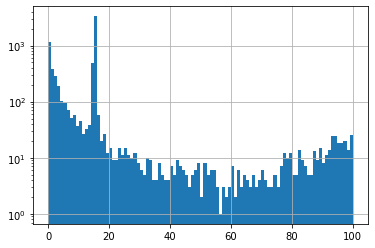

In [6]:
paper_dataset["fuelexp"].hist(bins=100).set_yscale('log')

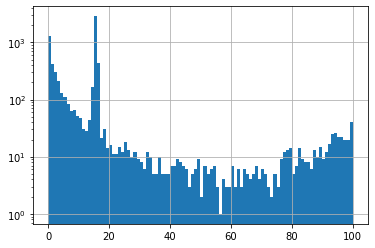

In [7]:
paper_dataset["fuel"].hist(bins=100).set_yscale('log')

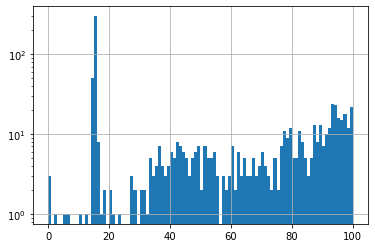

In [8]:
paper_dataset[paper_dataset["oil"] == 1]["fuelexp"].hist(bins=100).set_yscale('log')

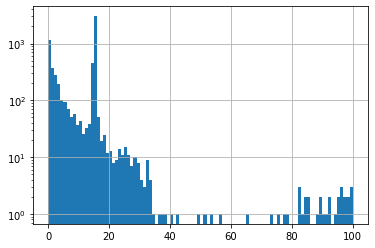

In [9]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

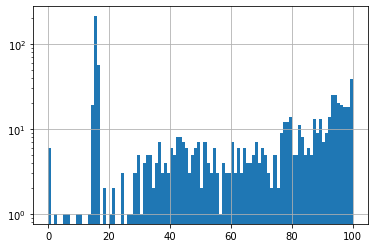

In [10]:
paper_dataset[paper_dataset["oil"] == 1]["fuel"].hist(bins=100).set_yscale('log')

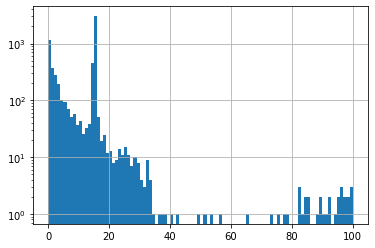

In [11]:
paper_dataset[paper_dataset["oil"] == 0]["fuelexp"].hist(bins=100).set_yscale('log')

In [12]:
# cid uniquely identifies a country, however in some cases when a country splits we have the 
# same CID for 2 different names in different years. This might be solved by joining on (year, cid)

paper_data_countries = pd.read_stata(ORIGINAL_PAPER_COUNTRY, columns=["country", "cid", "year"]).drop_duplicates()
#paper_data_countries.sample(10)
#paper_data_countries[paper_data_countries[["year", "cid"]].duplicated(keep=False)]

paper_data_countries[paper_data_countries["country"] == "Czechoslovakia"]

,country,cid,year
2240,Czechoslovakia,41.0,1945.0
2241,Czechoslovakia,41.0,1946.0
2242,Czechoslovakia,41.0,1947.0
2243,Czechoslovakia,41.0,1948.0
2244,Czechoslovakia,41.0,1949.0
2245,Czechoslovakia,41.0,1950.0
2246,Czechoslovakia,41.0,1951.0
2247,Czechoslovakia,41.0,1952.0
2248,Czechoslovakia,41.0,1953.0
2249,Czechoslovakia,41.0,1954.0


In [13]:
# Note to future selves: we lost Korea 1945-1949
paper_data_merged = paper_data_countries.merge(paper_dataset, on=["cid", "year"])

In [15]:
paper_data_merged.sample(10)

,country,cid,year,Unnamed: 0,atwards,X,id,cowcode,warstds,ptime,...,decade1,decade2,decade3,decade4,independ,tip,anocracy,proxregc,sxpnew.2,sxpsq.2
3109,Israel,74.0,1962.0,3110,1,4106,68.0,666,0,6,...,1,0,0,0,1,14.000000,0,5.960000e-08,-0.539252,-0.539252
823,Bulgaria,23.0,1967.0,824,0,1255,20.0,355,0,276,...,1,0,0,0,1,45.000000,0,3.640000e-12,0.083040,0.083040
3034,Iraq,72.0,1997.0,3035,0,4029,66.0,645,0,367,...,0,0,0,1,1,0.000000,0,0.000000e+00,-0.071350,-0.071350
7027,Yugoslavia,169.0,2000.0,7028,0,9464,158.0,347,0,657,...,0,0,0,0,1,44.180859,0,2.020000e-28,0.014801,0.014801
6586,USSR/Russia,156.0,1986.0,6587,0,8722,147.0,364,0,504,...,0,0,1,0,1,35.000000,0,1.180000e-38,-0.005739,-0.005739
2785,Iceland,68.0,1967.0,2786,0,3775,62.0,395,0,276,...,1,0,0,0,1,24.000000,0,1.260000e-29,0.639435,0.639435
5403,Saudi Arabia,127.0,1988.0,5404,0,7100,117.0,670,0,528,...,0,0,1,0,1,59.000000,0,1.880000e-37,0.099609,0.099609
4092,Mauritania,99.0,1981.0,4093,0,5525,87.0,435,0,264,...,0,0,1,0,1,21.000000,0,1.460000e-11,0.100280,0.100280
802,Bulgaria,23.0,1946.0,803,0,1234,20.0,355,0,24,...,0,0,0,0,1,24.000000,1,1.000000e+00,0.096325,0.096325
3598,Latvia,86.0,1998.0,3599,0,4814,170.0,367,0,96,...,0,0,0,0,1,7.000000,0,2.441410e-04,0.093552,0.093552


In [ ]:
paper_data_merged[["country", "fuelexp", ]]

In [202]:

years = np.unique(paper_data_merged.year.values)
countries = np.unique(paper_data_merged.country.values)

#df = pd.DataFrame(index = countries, columns = years)
fuelexp_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["fuelexp"])
fuelexp_pivot.columns = [int(x[1]) for x in fuelexp_pivot.columns]

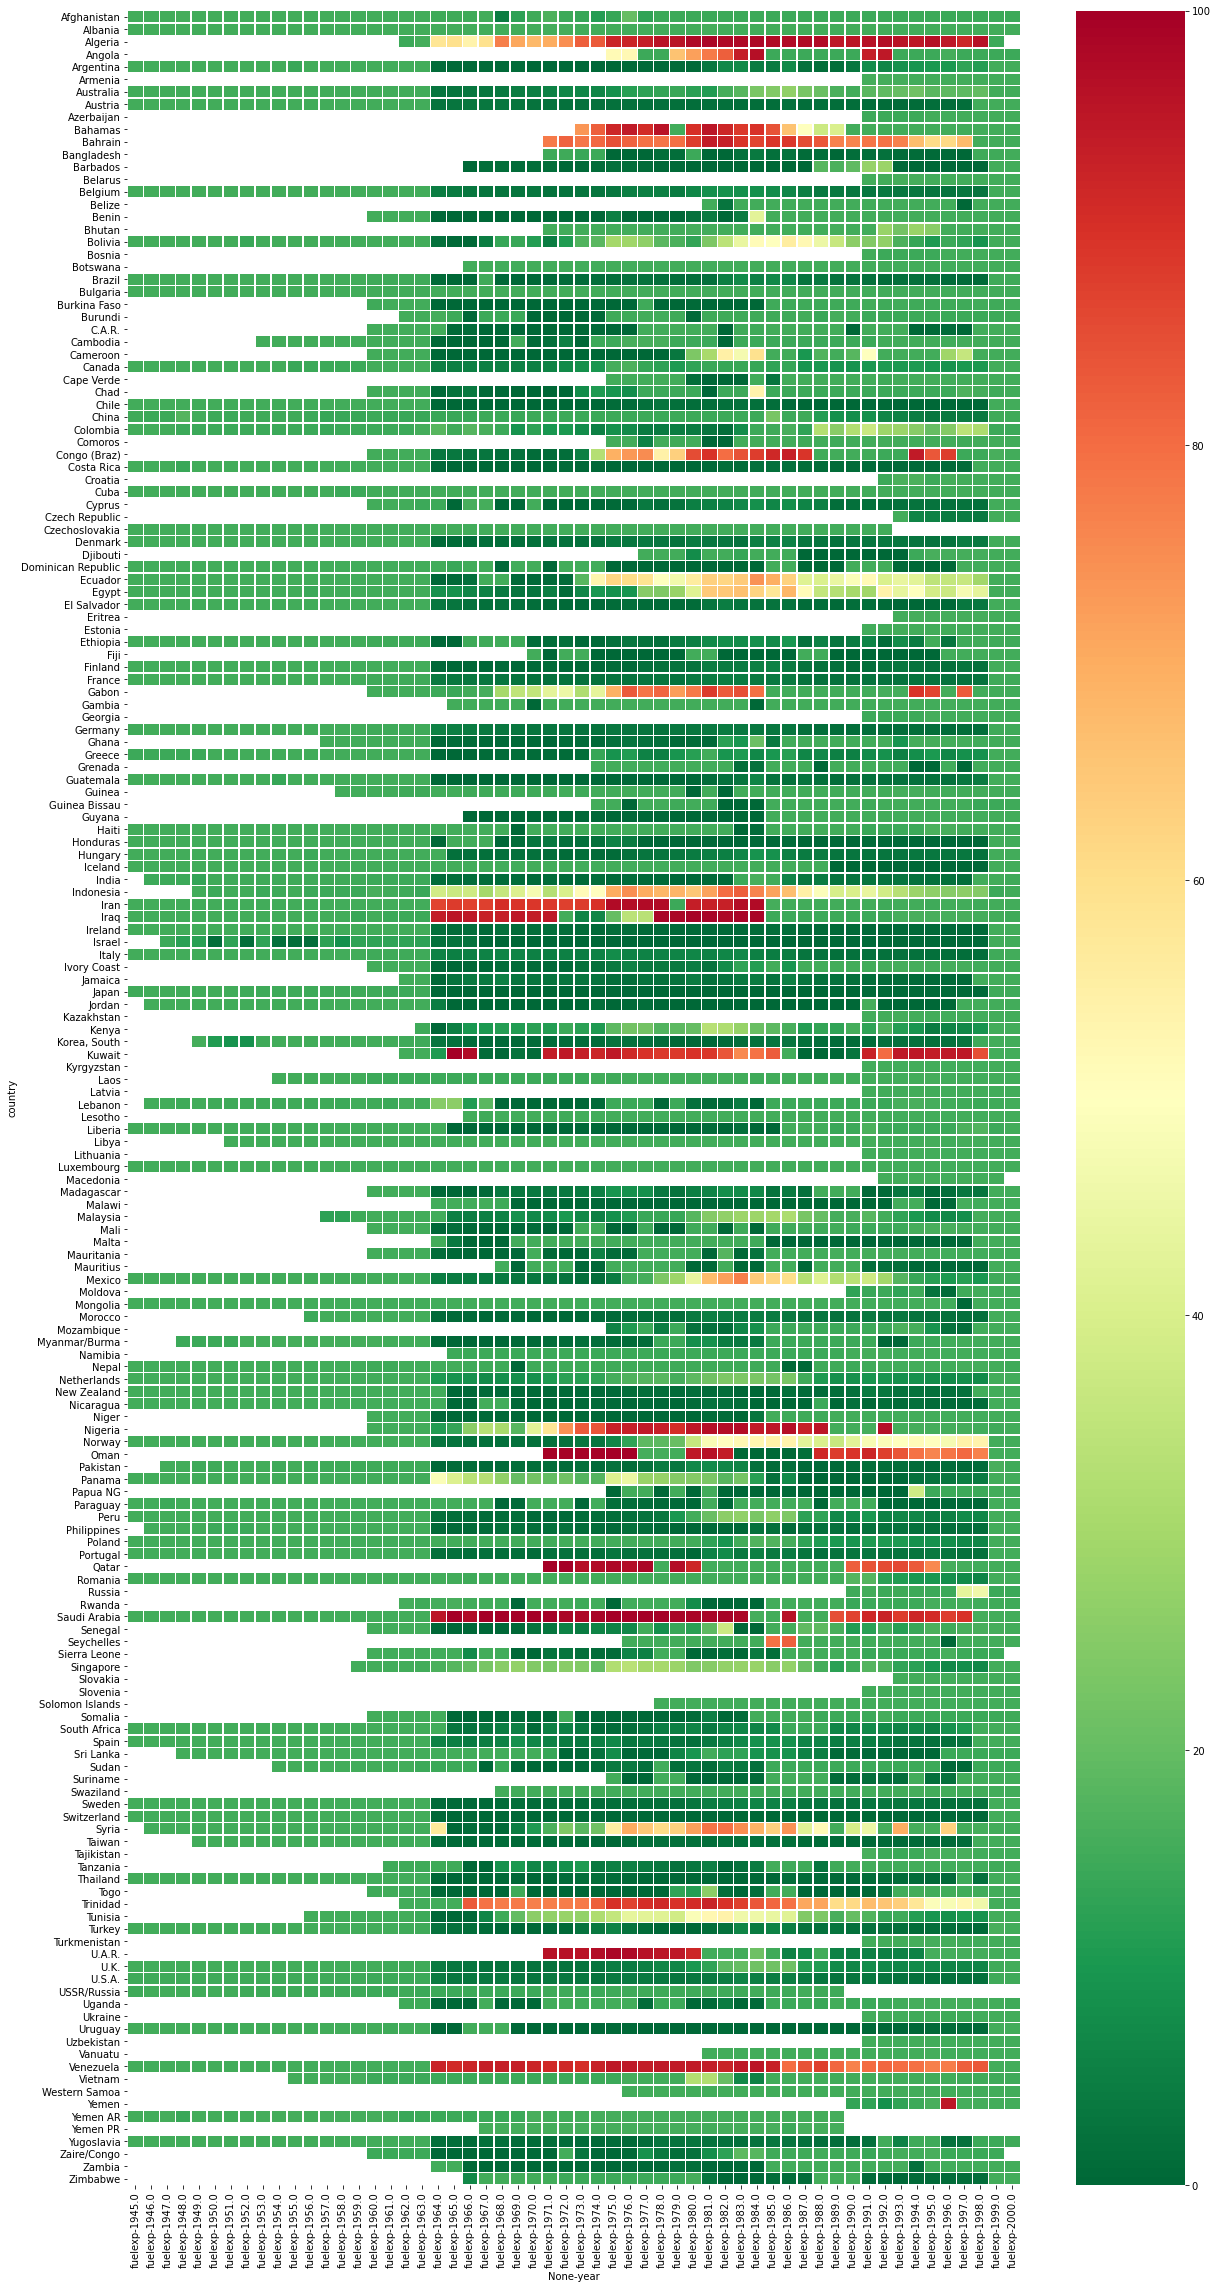

In [178]:
plt.figure(figsize=(20, 40))

sns.heatmap(fuelexp_pivot, cmap='RdYlGn_r', linewidths=0.5)

plt.show()

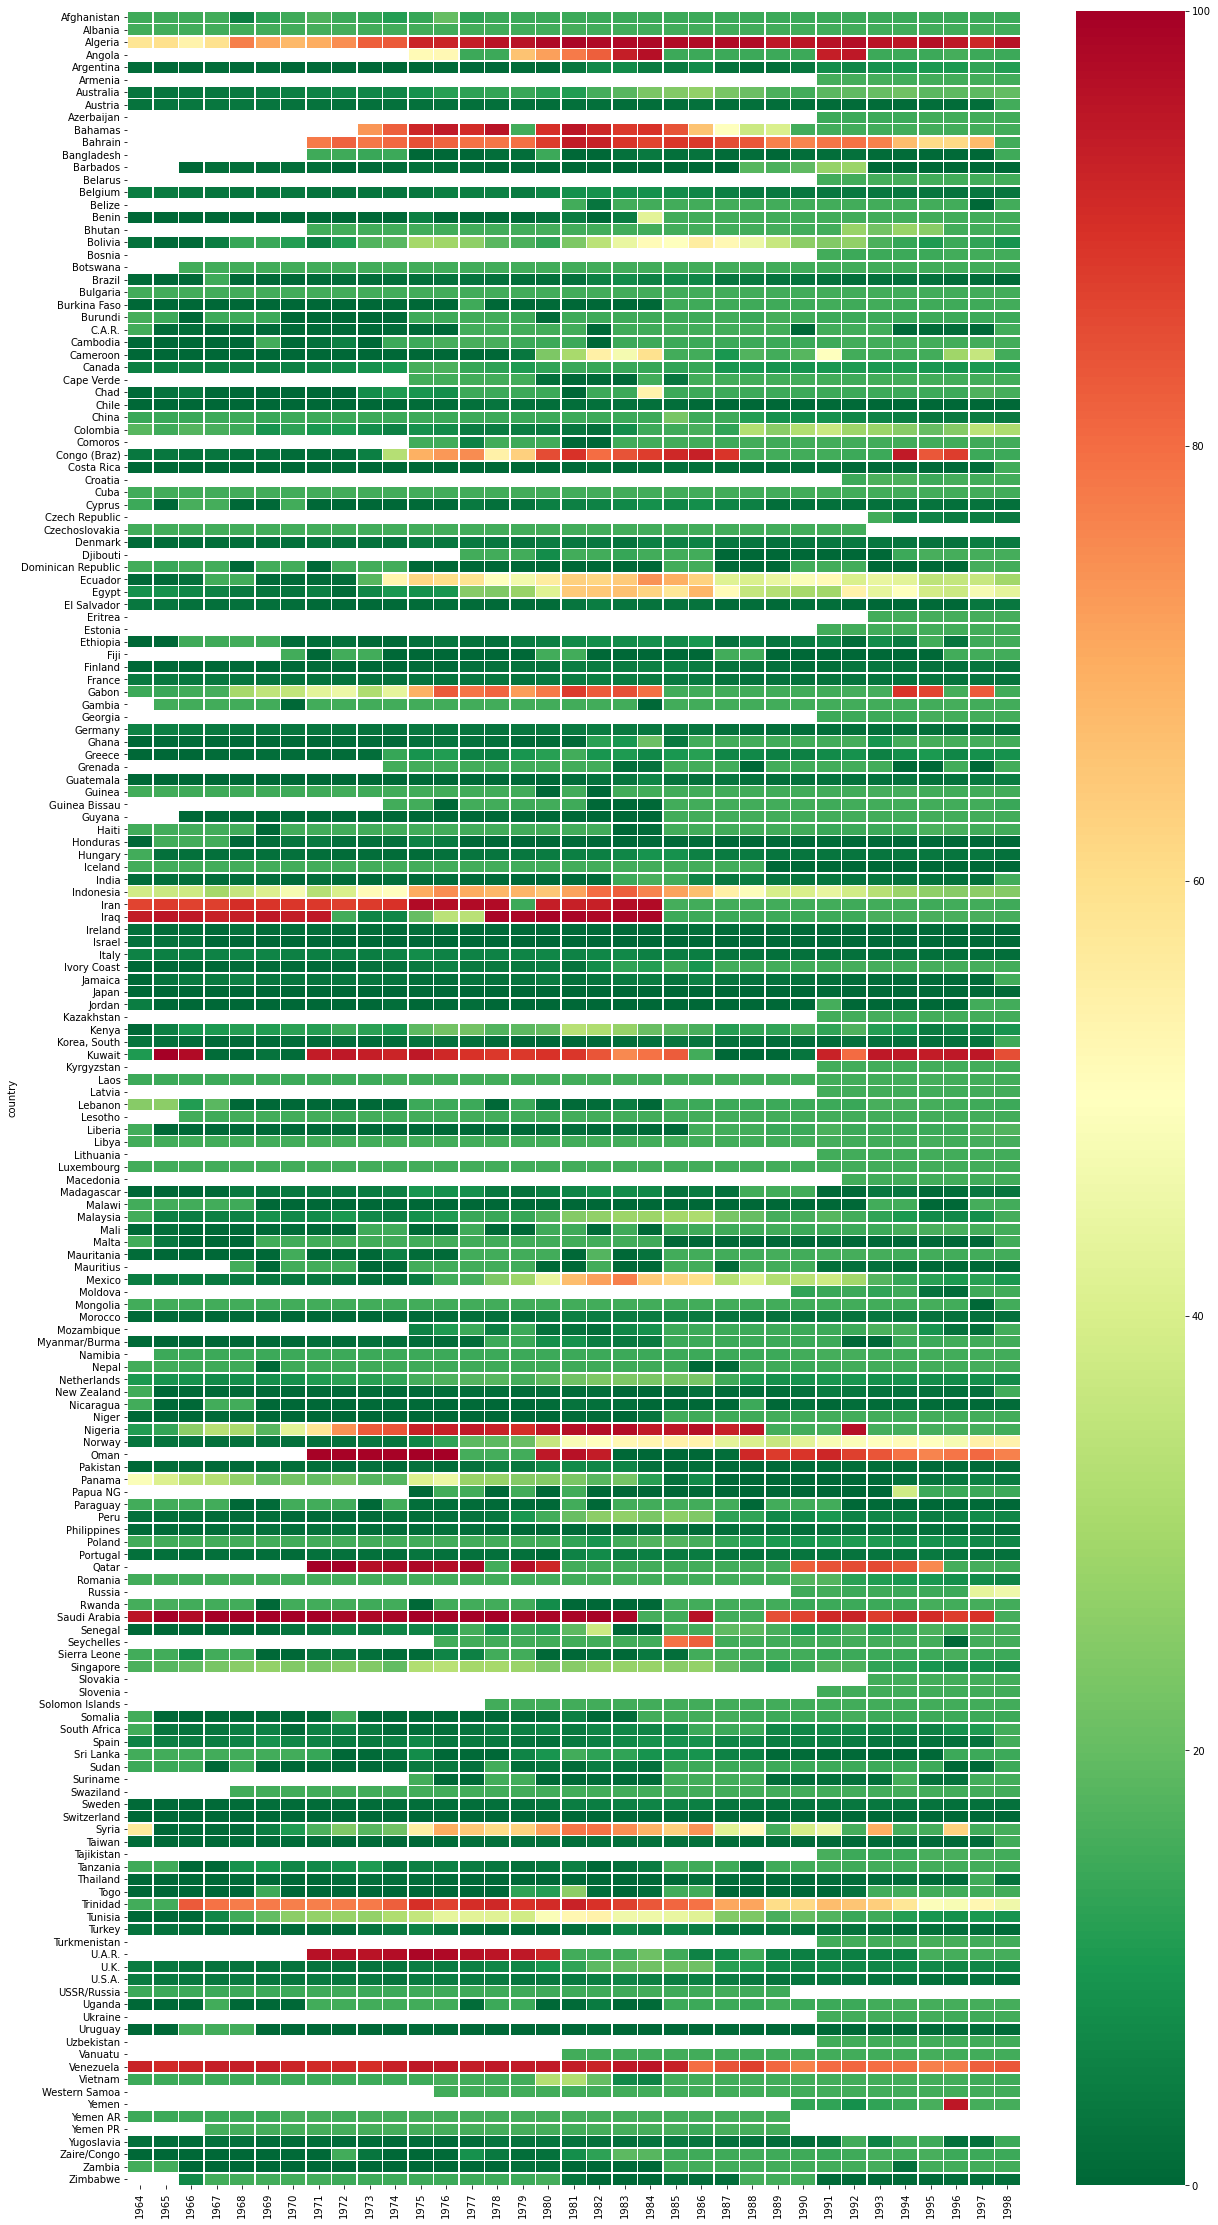

In [204]:
plt.figure(figsize=(20, 40))

sns.heatmap(fuelexp_pivot[range(1964, 1999)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [209]:
illit_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["illiteracy"])
illit_pivot.columns = [int(x[1]) for x in illit_pivot.columns]

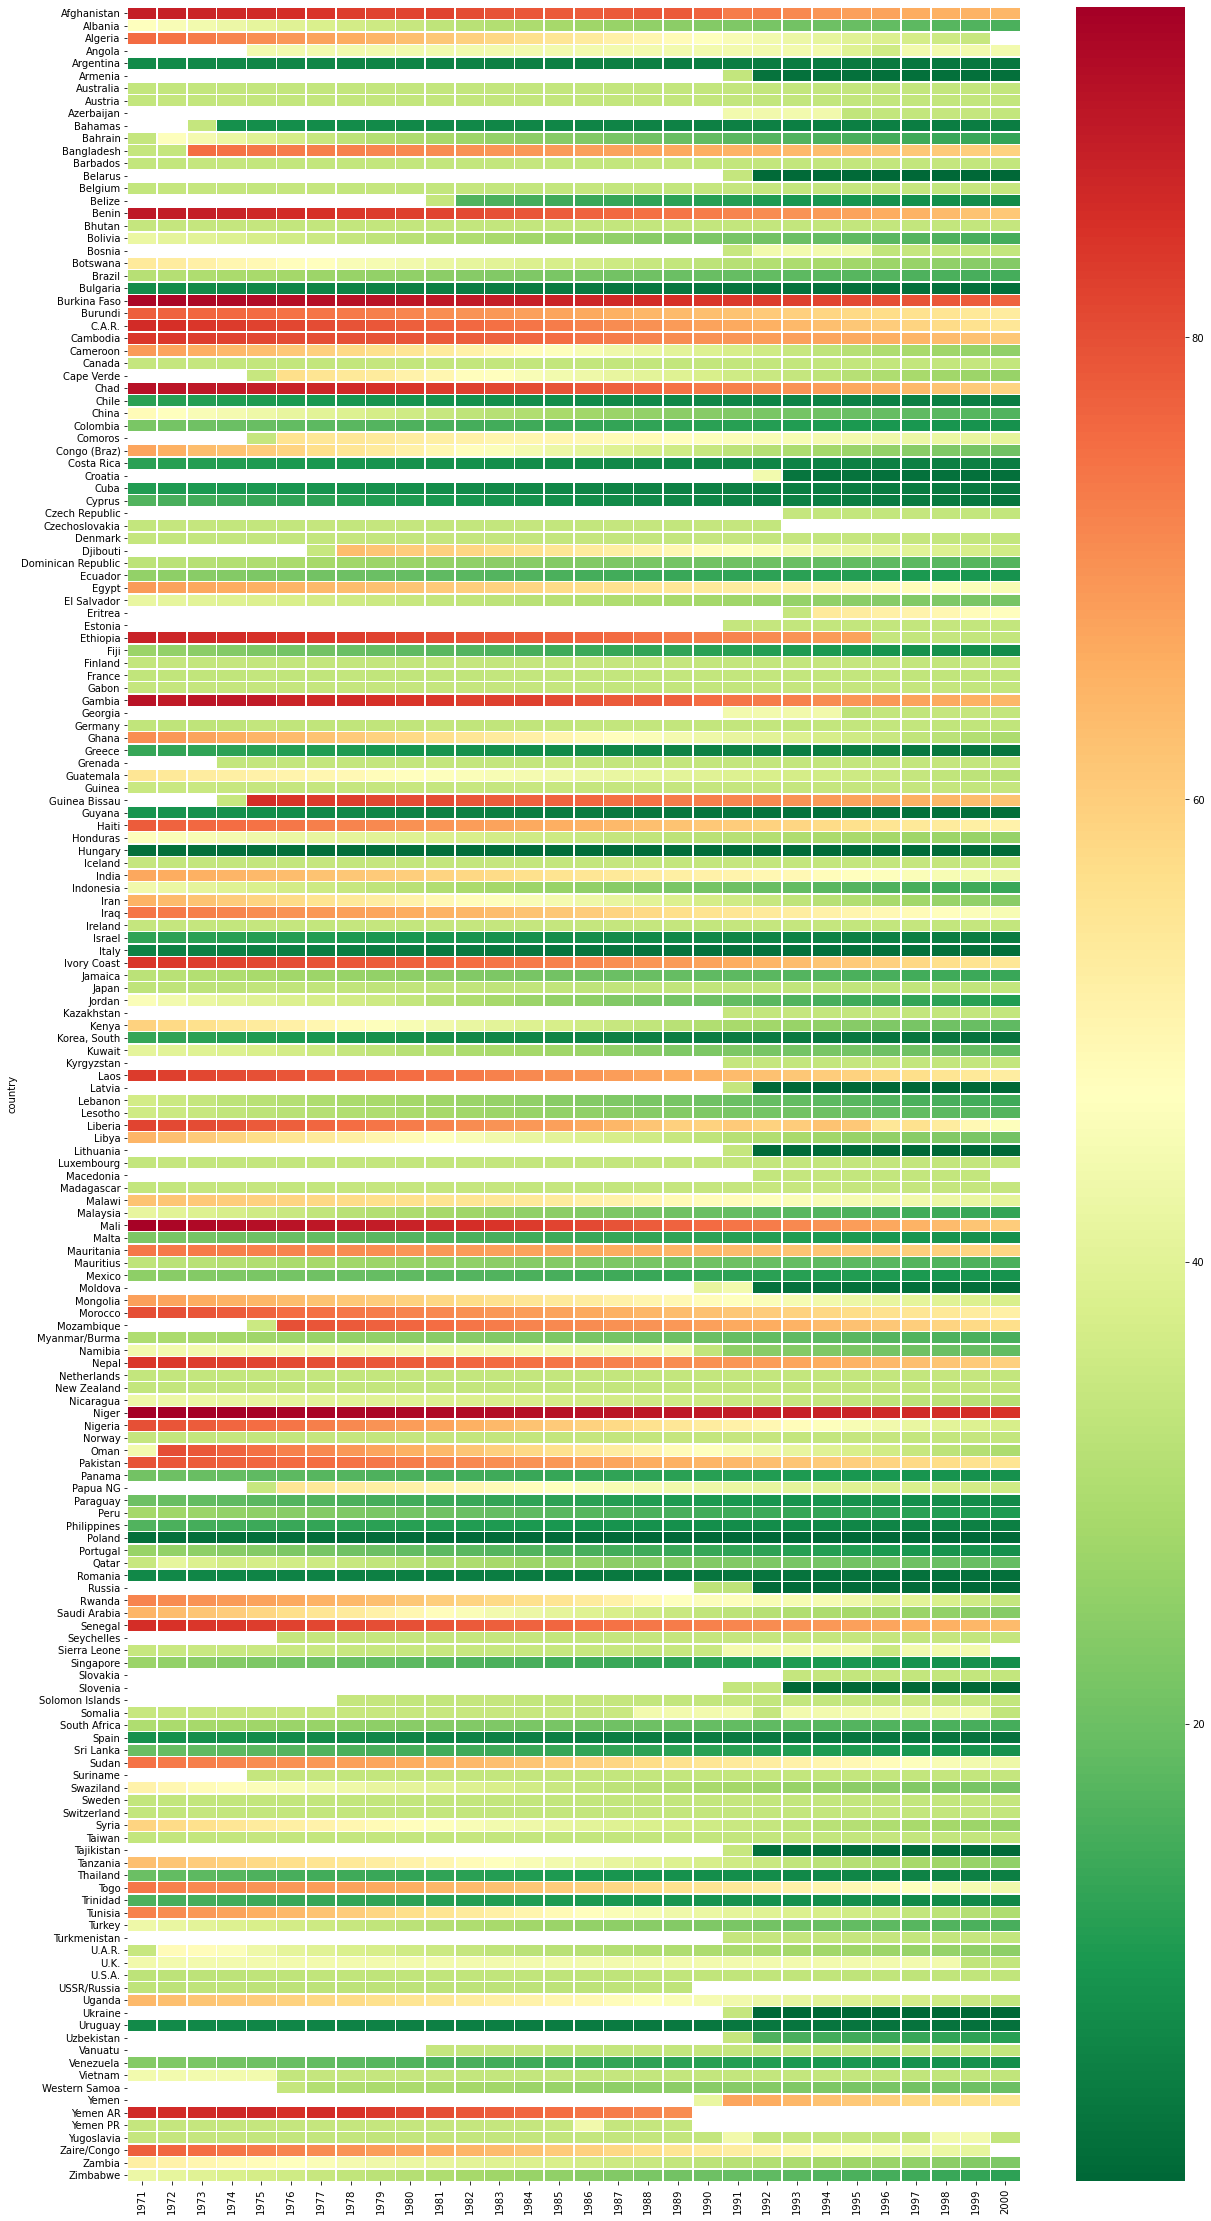

In [213]:
plt.figure(figsize=(20, 40))

sns.heatmap(illit_pivot[range(1971, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [215]:
infant_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["infant"])
infant_pivot.columns = [int(x[1]) for x in infant_pivot.columns]

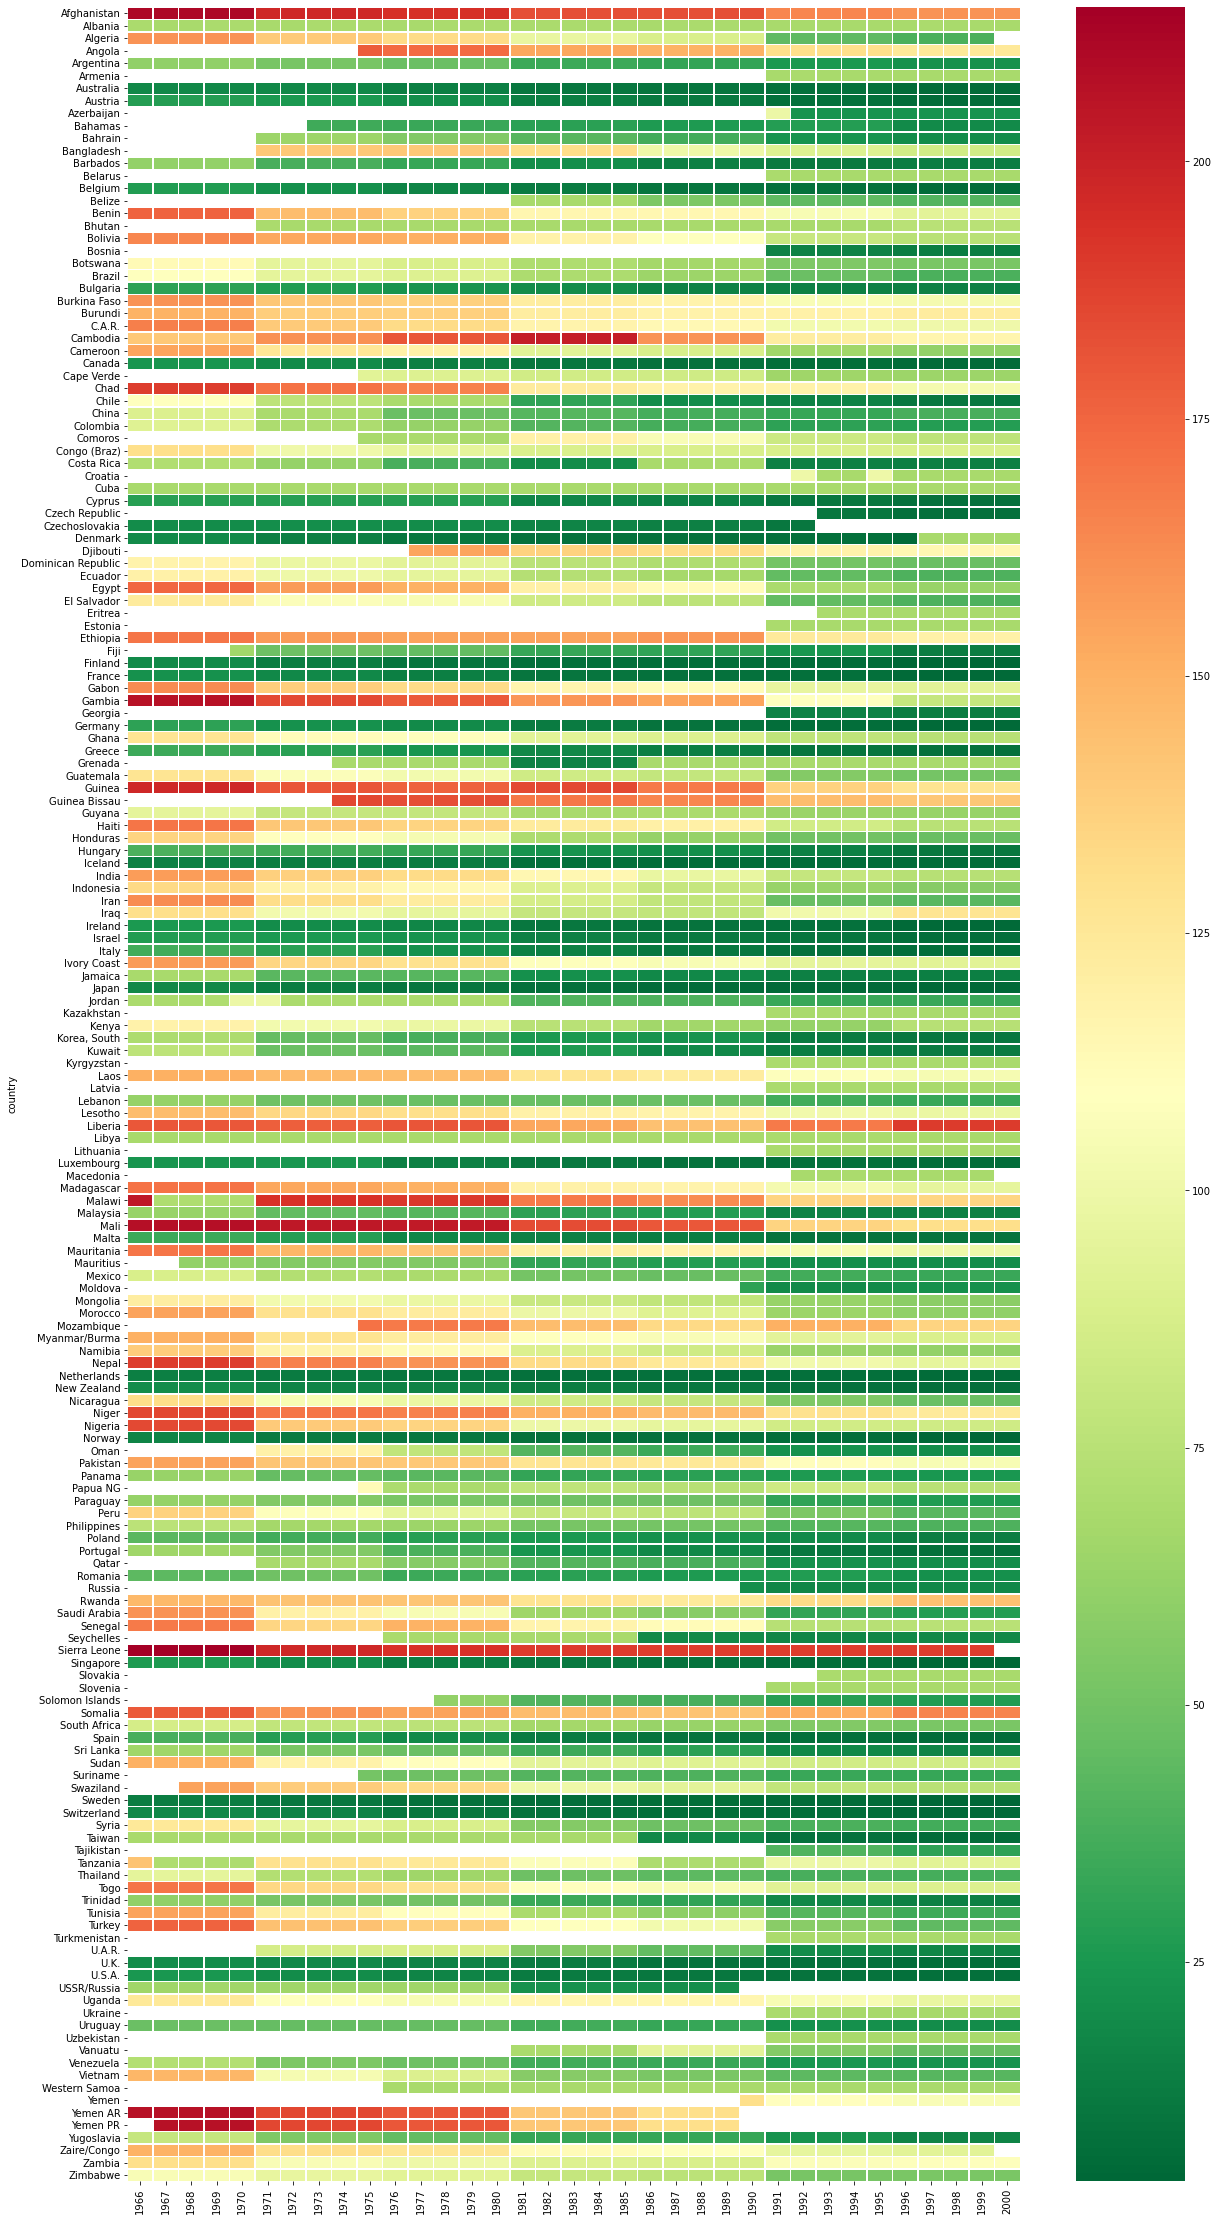

In [218]:
plt.figure(figsize=(20, 40))

sns.heatmap(infant_pivot[range(1966, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [219]:
life_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["life"])
life_pivot.columns = [int(x[1]) for x in life_pivot.columns]

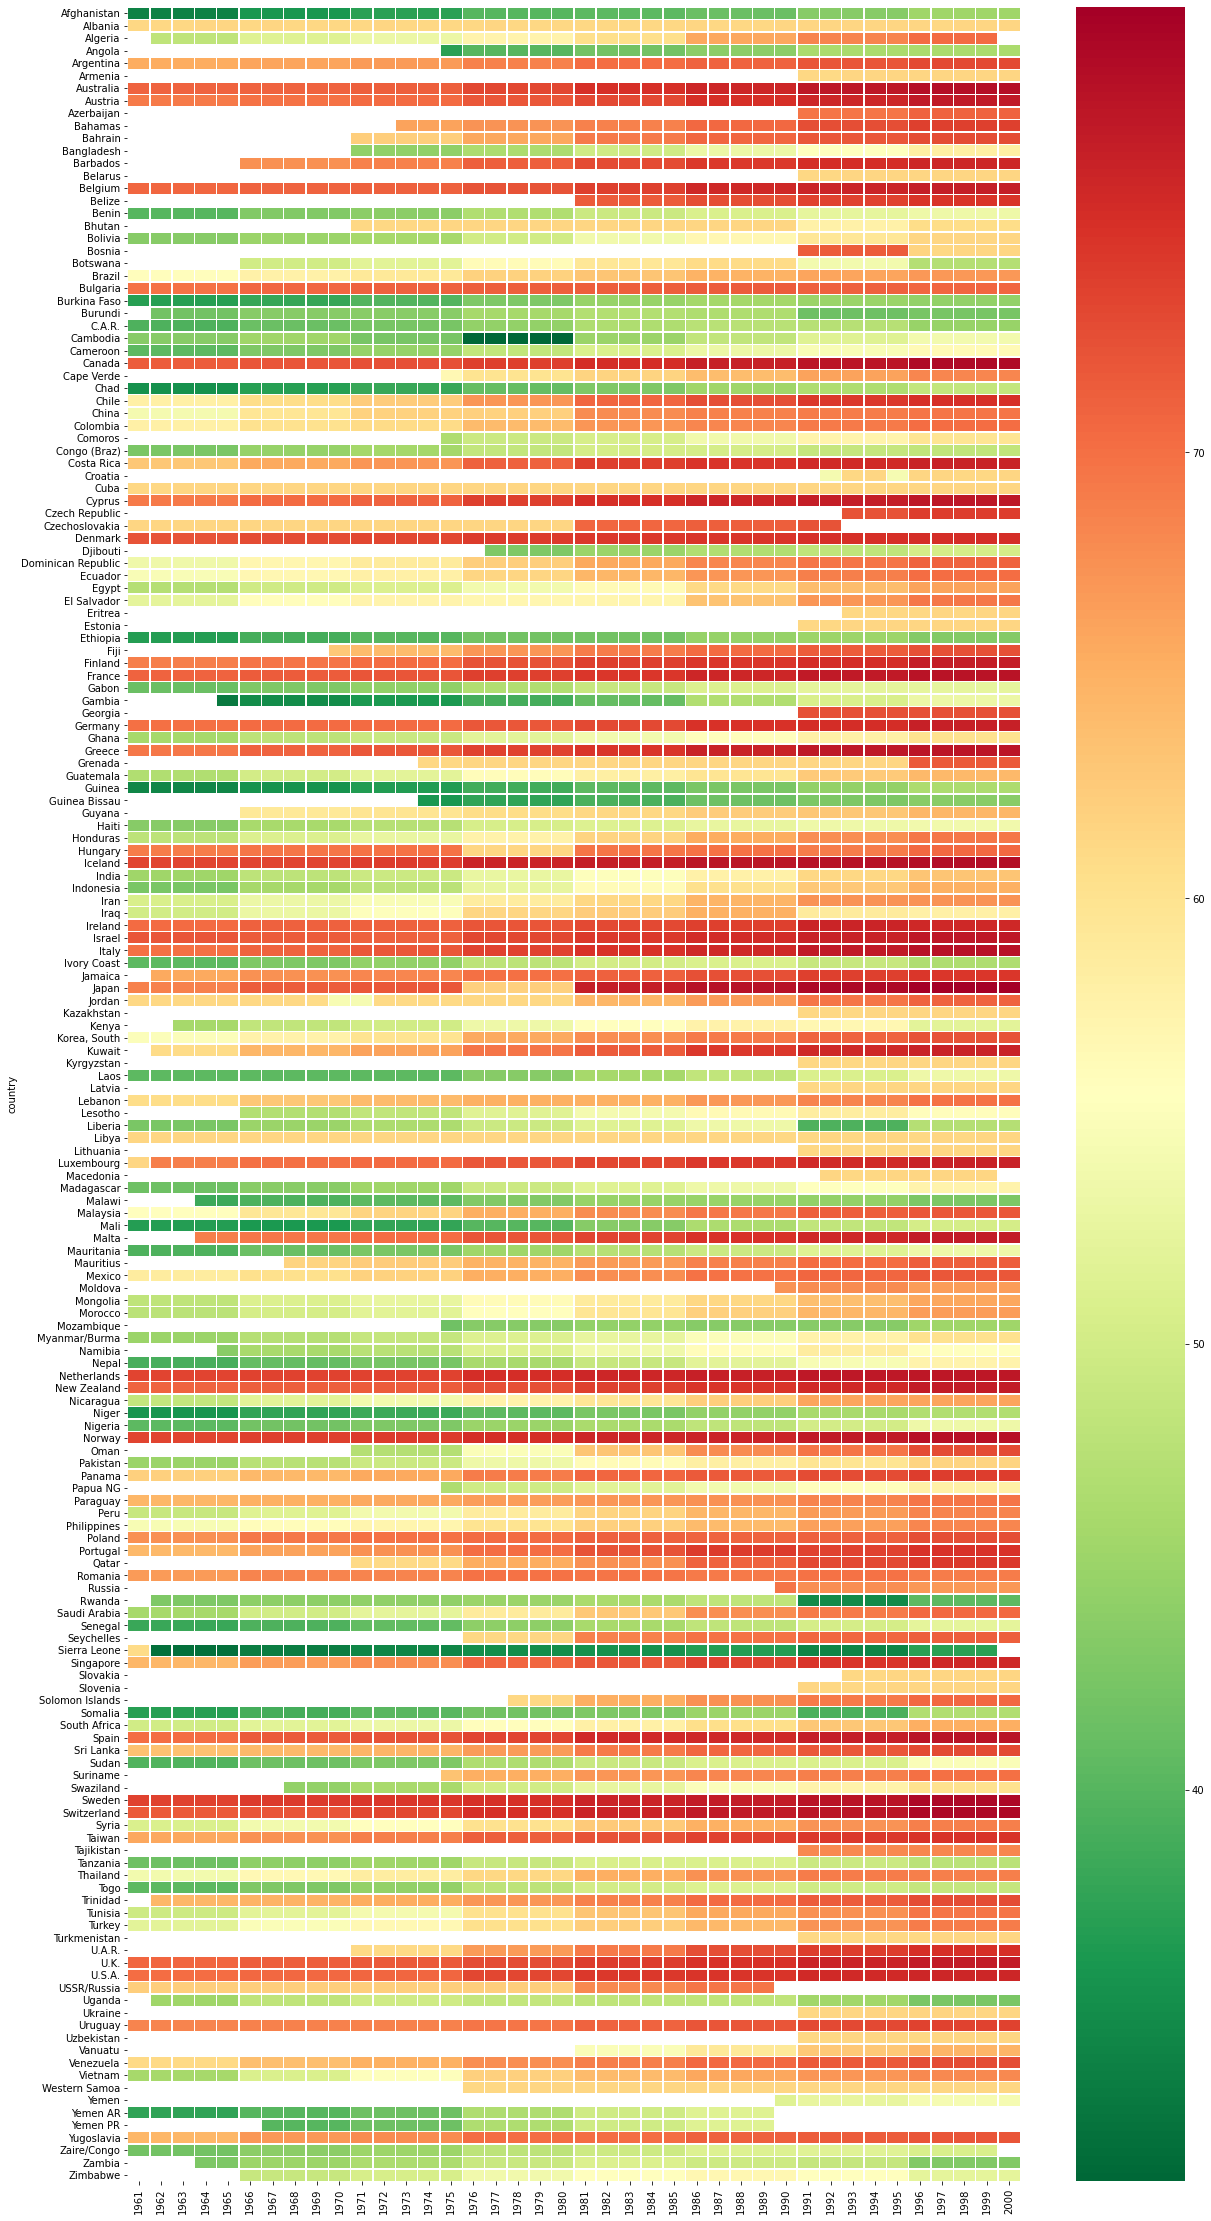

In [221]:
plt.figure(figsize=(20, 40))

sns.heatmap(life_pivot[range(1961, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

In [223]:
gdpg_pivot = pd.pivot_table(data = paper_data_merged, columns=["year"], index = "country", values=["life"])
gdpg_pivot.columns = [int(x[1]) for x in gdpg_pivot.columns]

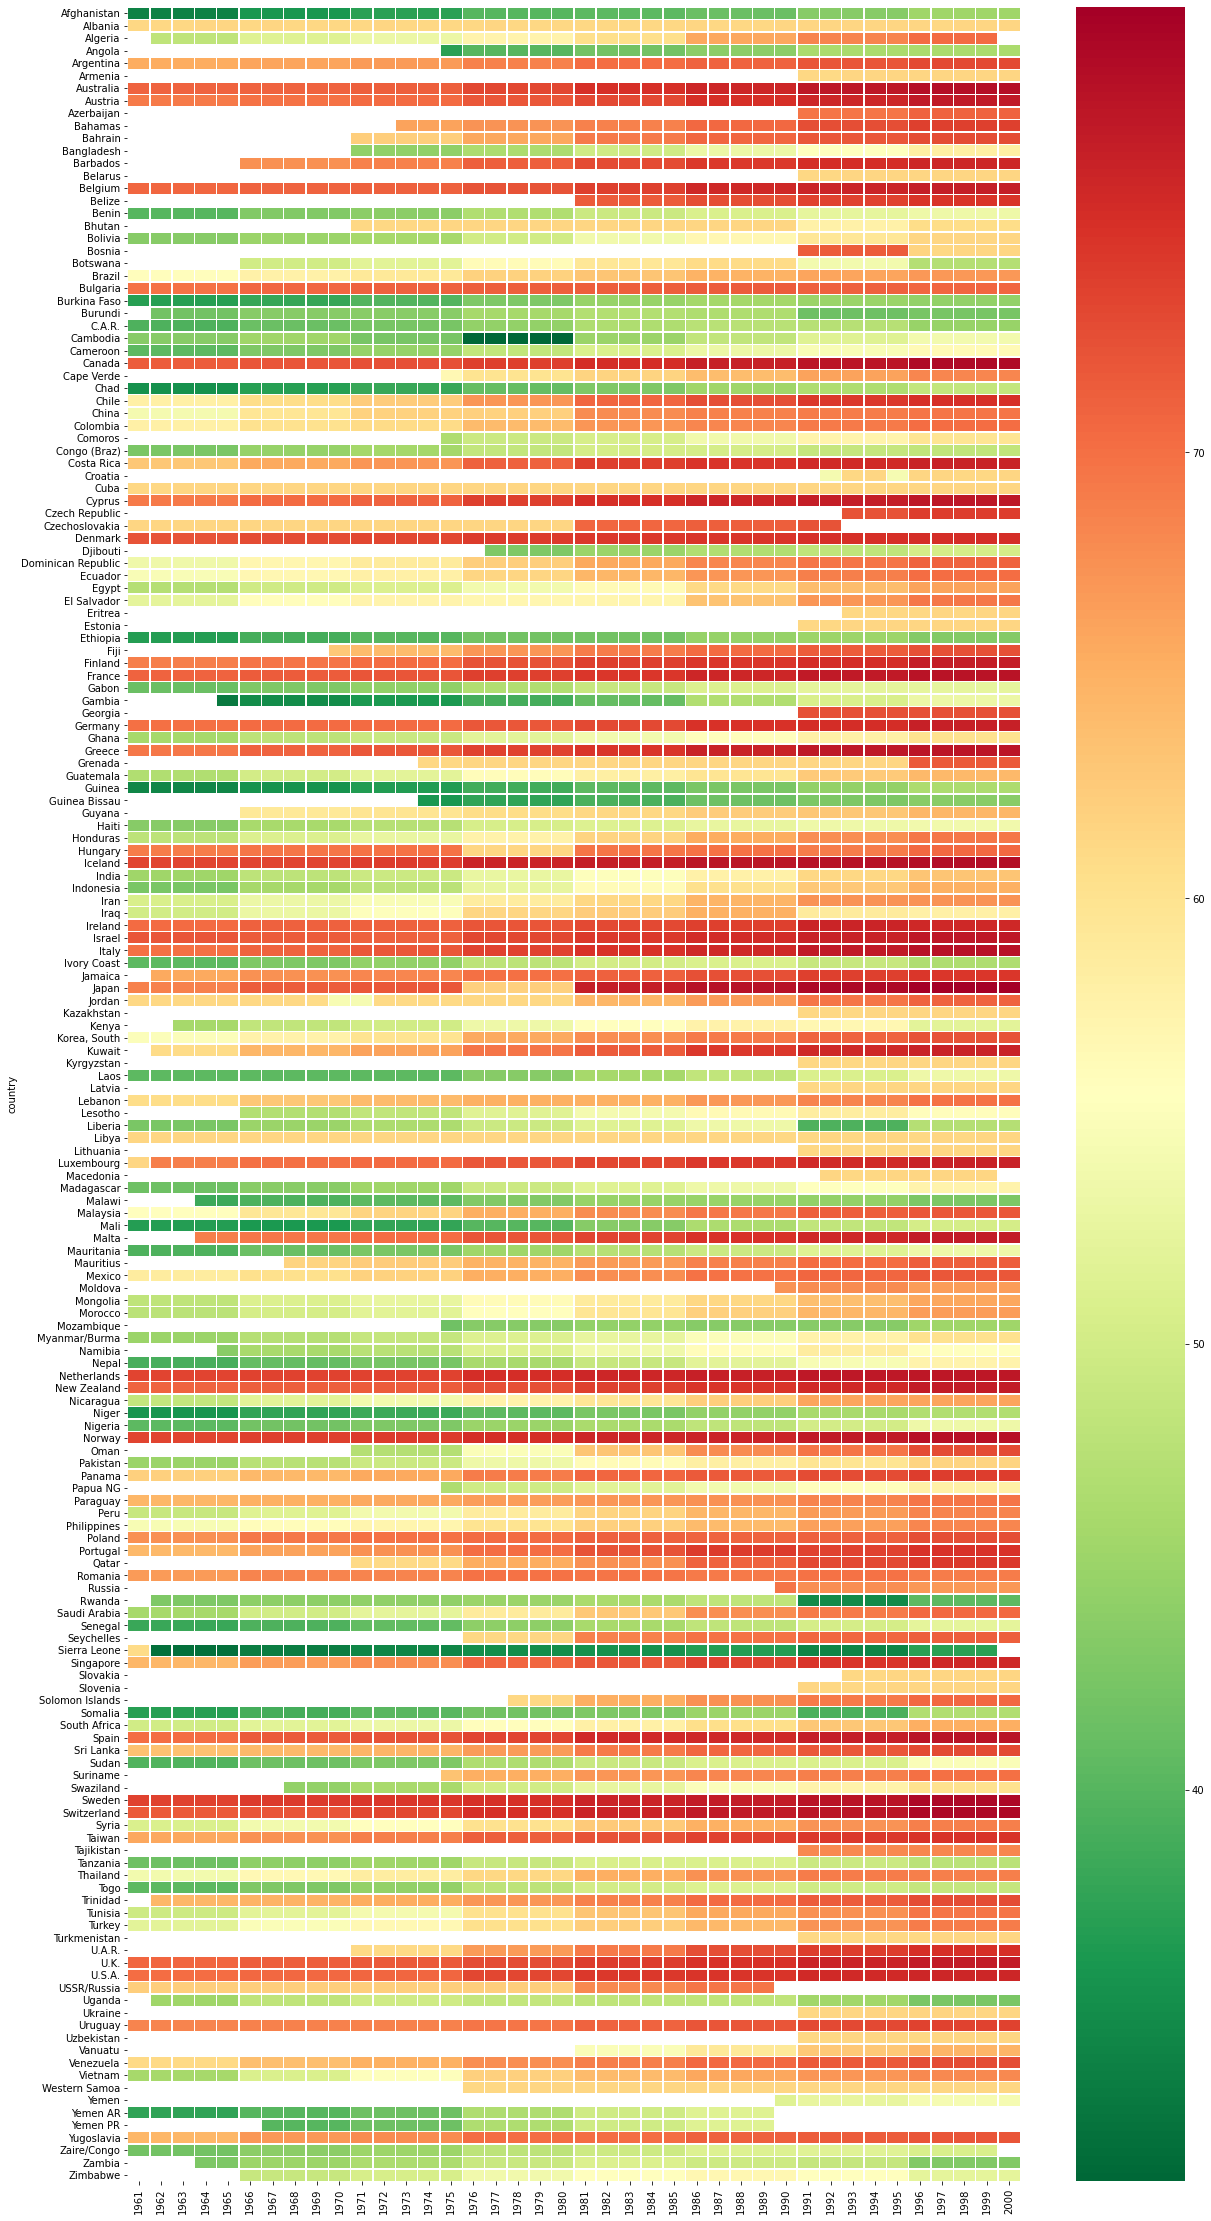

In [225]:
plt.figure(figsize=(20, 40))

sns.heatmap(gdpg_pivot[range(1961, 2001)], cmap='RdYlGn_r', linewidths=0.5)
plt.xticks(rotation=90)
plt.show()

## Data wrangling for wars in territories

1. Get a row for each territory there was a war in for each year
2. For each country that was at war, match name with existing database
2. We need some data cleaning: US never had a war in its territory!
3. For each year, add a 'war in' column in the existing database for each country + intensity level


In [ ]:
# 1 extra-systemic (state vs non-state in state territory to keep control of the system) <- colonies
# 2 inter-state  
# 3 intra-state
# 4 intra-state internationalized

In [54]:
ucdp_prio_data.columns

Index(['conflict_id', 'location', 'side_a', 'side_a_id', 'side_a_2nd',
       'side_b', 'side_b_id', 'side_b_2nd', 'incompatibility',
       'territory_name', 'year', 'intensity_level', 'cumulative_intensity',
       'type_of_conflict', 'start_date', 'start_prec', 'start_date2',
       'start_prec2', 'ep_end', 'ep_end_date', 'ep_end_prec', 'gwno_a',
       'gwno_a_2nd', 'gwno_b', 'gwno_b_2nd', 'gwno_loc', 'region', 'version'],
      dtype='object')

In [94]:
len(ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 1) & (ucdp_prio_data.cumulative_intensity == 0)]) # In this case, war is fought in location : we got this

50

In [75]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 1] # In this case, war is fought in location : we got this

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
154,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
155,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
156,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
157,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
158,201,Cambodia (Kampuchea),Government of France,33,NaN,Khmer Issarak,160,NaN,1,Cambodia,...,0,NaN,NaN,220,NaN,NaN,NaN,811,3,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,285,Mozambique,Government of Portugal,36,NaN,Frelimo,428,NaN,1,Mozambique,...,1,1974-09-07,NaN,235,NaN,NaN,NaN,541,4,20.1
1104,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1
1105,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1
1106,286,South Yemen,Government of United Kingdom,28,NaN,FLOSY,265,NaN,1,Aden/South Yemen,...,0,NaN,NaN,200,NaN,NaN,NaN,680,2,20.1


In [80]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 2] # No clear idea: however, only 48 conflicts: we can classify manually

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,20.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,20.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,20.1
5,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1973-10-24,NaN,651,NaN,666,NaN,"651, 666",2,20.1
31,11348,"South Sudan, Sudan",Government of South Sudan,113,NaN,Government of Sudan,112,NaN,1,Common border,...,1,2012-12-26,NaN,626,NaN,625,NaN,"625, 626",4,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,409,"Eritrea, Ethiopia",Government of Eritrea,98,NaN,Government of Ethiopia,97,NaN,1,Common border,...,1,2016-06-13,NaN,531,NaN,530,NaN,"530, 531",4,20.1
2354,420,"Australia, Iraq, United Kingdom, United States...","Government of Australia, Government of United ...","156, 28, 3",NaN,Government of Iraq,116,NaN,2,NaN,...,1,2003-04-28,NaN,"900, 200, 2",NaN,645,NaN,"2, 200, 645, 900","1, 2, 3, 5",20.1
2401,427,"Tanzania, Uganda",Government of Tanzania,92,NaN,Government of Uganda,90,NaN,1,Kagera Salient,...,1,1978-11-16,NaN,510,NaN,500,NaN,"500, 510",4,20.1
2414,431,"Afghanistan, Russia (Soviet Union)",Government of Afghanistan,130,NaN,Government of Russia (Soviet Union),57,NaN,2,NaN,...,1,1979-12-28,NaN,700,NaN,365,NaN,"365, 700","1, 3",20.1


In [74]:
ucdp_prio_data[ucdp_prio_data.type_of_conflict == 3] # In this case, war is fought in location : we got this

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2012-12-21,NaN,750,NaN,NaN,NaN,750,3,20.1
1,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2014-11-27,NaN,750,NaN,NaN,NaN,750,3,20.1
6,11344,Sudan,Government of Sudan,112,NaN,Republic of South Sudan,1129,NaN,1,Abyei,...,1,2011-06-15,NaN,625,NaN,NaN,NaN,625,4,20.1
7,11345,South Sudan,Government of South Sudan,113,NaN,"SSDM/A, SSLM/A","1108, 1124",NaN,2,NaN,...,0,NaN,NaN,626,NaN,NaN,NaN,626,4,20.1
8,11345,South Sudan,Government of South Sudan,113,NaN,SSLM/A,1124,NaN,2,NaN,...,0,NaN,NaN,626,NaN,NaN,NaN,626,4,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2443,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2444,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,0,NaN,NaN,775,NaN,NaN,NaN,775,3,20.1
2445,440,Myanmar (Burma),Government of Myanmar (Burma),144,NaN,LNUP,889,NaN,1,Lahu,...,1,1982-12-31,NaN,775,NaN,NaN,NaN,775,3,20.1


In [122]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict == 3) & (ucdp_prio_data.intensity_level == 1) & (ucdp_prio_data.location == 'United Kingdom')]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
1499,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1500,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1501,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1502,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1503,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1504,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1505,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1506,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1507,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1
1508,315,United Kingdom,Government of United Kingdom,28,NaN,PIRA,282,NaN,1,Northern Ireland,...,0,NaN,NaN,200,NaN,NaN,NaN,200,1,20.1


In [111]:
ucdp_prio_data[(ucdp_prio_data.type_of_conflict != 2) & (ucdp_prio_data.location.str.contains('United States'))]

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
705,238,United States of America,Government of United States of America,3,NaN,Puerto Rican Nationalist Party,733,NaN,1,Puerto Rico,...,1,1950-11-01,NaN,2,NaN,NaN,NaN,2,5,20.1
2332,418,United States of America,Government of United States of America,3,"Government of Australia, Government of Canada,...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"900, 20, 220, 260, 325, 290, 640, 200",NaN,NaN,2,5,20.1
2333,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Austr...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 900, 20, 390, 220, 260, 350, 325, 740, 66...",NaN,NaN,2,5,20.1
2334,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Canad...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 20, 390, 220, 325, 368, 210, 920, 385, 77...",NaN,NaN,2,5,20.1
2335,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Belgi...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 211, 20, 316, 220, 260, 325, 770, 290, 23...",NaN,NaN,2,5,20.1
2336,418,United States of America,Government of United States of America,3,"Government of Belgium, Government of Canada, G...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"211, 20, 344, 390, 366, 220, 325, 690, 210, 38...",NaN,NaN,2,5,20.1
2337,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Pakis...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 770, 670, 200",NaN,NaN,2,5,20.1
2338,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Pakis...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 770, 670, 200",NaN,NaN,2,5,20.1
2339,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Czech...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 316, 770, 360",NaN,NaN,2,5,20.1
2340,418,United States of America,Government of United States of America,3,"Government of Afghanistan, Government of Canad...",al-Qaida,769,NaN,2,NaN,...,0,NaN,NaN,2,"700, 20, 316, 220, 663, 210, 770, 360",NaN,NaN,2,5,20.1


In [ ]:
# Idea: always match countries with others that have the same intensity of war. Keep all intensities. 